# Statistics

Having a solid understanding of statistics in data science allows us to understand our data better, and allows us to create a quantifiable evaluation of any future conclusions.

In [1]:
using Pkg
Pkg.activate(".")

  Activating 

environment at `e:\Projects\julia-intro\data-science\Project.toml`


In [3]:
Pkg.status()

      Status `E:\Projects\julia-intro\data-science\Project.toml`
  [336ed68f] CSV v0.8.5
  [a93c6f00] DataFrames v1.2.2
  [31c24e10] Distributions v0.25.18
  [09f84164] HypothesisTests v0.10.4
  [916415d5] Images v0.24.1
  [4138dd39] JLD v0.12.3
  [5ab0869b] KernelDensity v0.6.3
  [23992714] MAT v0.10.1
  [f0e99cf1] MLBase v0.9.0
  [15e1cf62] NPZ v0.4.1
  [91a5bcdd] Plots v1.22.3
  [438e738f] PyCall v1.92.3
  [df47a6cb] RData v0.8.3
  [ce6b1742] RDatasets v0.7.5
  [2913bbd2] StatsBase v0.33.10
  [f3b207a7] StatsPlots v0.14.28
  [fdbf4ff8] XLSX v0.7.8
  [37e2e46d] LinearAlgebra
  [2f01184e] SparseArrays
  [10745b16] 

Statistics


In [4]:
using Statistics
using StatsBase
using RDatasets
using Plots
using StatsPlots
using KernelDensity
using Distributions
using LinearAlgebra
using HypothesisTests
# using PyCall
# using MLBase


In this notebook, we will use eruption data on the faithful geyser. The data will contain wait times between every consecutive times the geyser goes off and the length of the eruptions.

Let's get the data first...

In [5]:
D = dataset("datasets", "faithful")
@show names(D)

names(D) = 

2-element Vector{String}:
 "Eruptions"
 "Waiting"

["Eruptions", "Waiting"]


In [6]:
describe(D)

,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Real,Float64,Real,Int64,DataType
1,Eruptions,3.48778,1.6,4.0,5.1,0,Float64
2,Waiting,70.8971,43,76.0,96,0,Int64


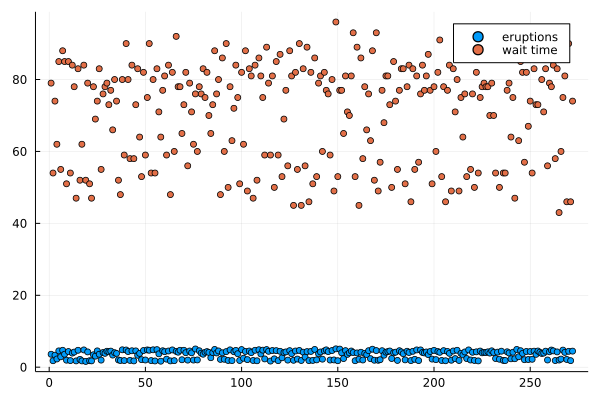

In [8]:
eruptions = D[!, :Eruptions]
scatter(eruptions, label="eruptions")
waittime = D[!, :Waiting]
scatter!(waittime, label="wait time")

# Statistics Plots

As you can see, this doesn't tell us much about the data...Let us try some statistical plots.

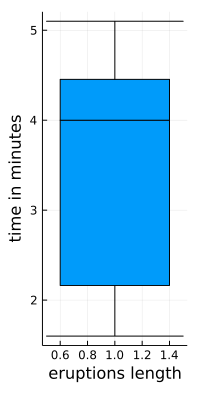

In [22]:
boxplot(eruptions, xlabel="eruptions length", ylabel="time in minutes", whisker_width=1, size=(200,400), legend=false)

Statistical plots such as a box plot (and a violin plot as we will see in notebook 12. Visualization), can provide a much better understanding of the data. Here, we immediately see that the median time of each eruption is about 4 minutes.

The next plot we will see is a histogram plot.

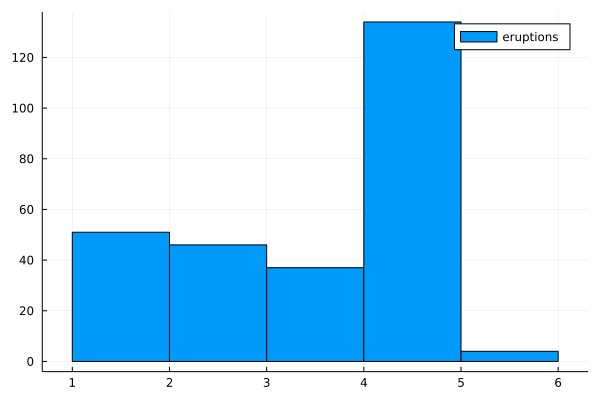

In [9]:
histogram(eruptions, label="eruptions")

You can adjust the number of bins manually or by passing a one of the autobinning functions.

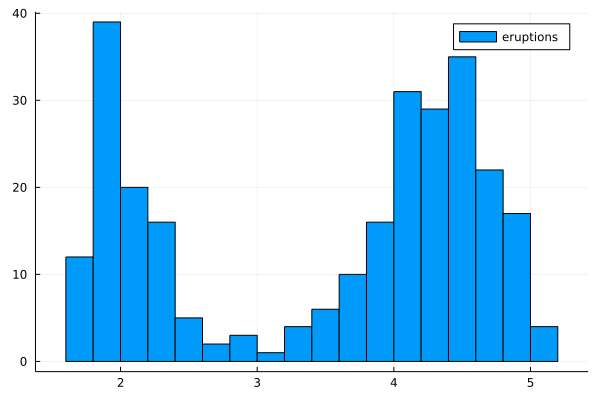

In [10]:
histogram(eruptions, bins=:sqrt, label="eruptions")

# Kernel Density Estimates

Next, we will see how we can fit a kernel density estimation function to our data. We will make use of the `KernelDensity.jl` package.

In [23]:
p = kde(eruptions)

UnivariateKDE{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}}(0.2608918621442271:0.0030181808870110138:6.439108137855772, [1.1161139442196488e-5, 1.1244427155283898e-5, 1.134417947318972e-5, 1.1460543286226366e-5, 1.1593684794600212e-5, 1.1743789689273865e-5, 1.1911063348885031e-5, 1.2095731053103631e-5, 1.2298038211885909e-5, 1.251825061161782e-5  …  1.1215022627776572e-5, 1.113759304486716e-5, 1.1076192604022629e-5, 1.1030781609130264e-5, 1.1001338720887342e-5, 1.0987860983038833e-5, 1.0990363864625714e-5, 1.100888131627415e-5, 1.1043465842311417e-5, 1.1094188587961774e-5])

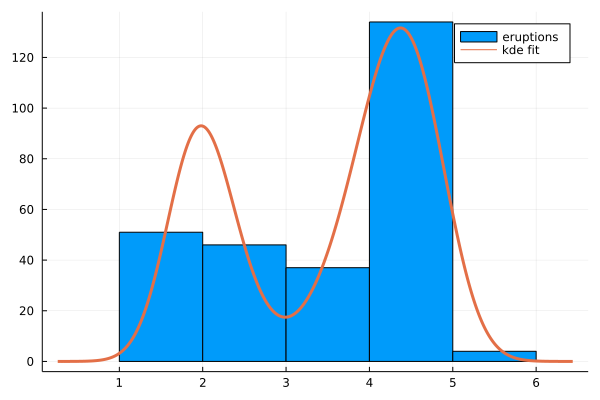

In [26]:
histogram(eruptions, label="eruptions")
plot!(p.x, p.density .*length(eruptions), linewidth=3, color=2, label="kde fit")  # Nb of elements*bin width

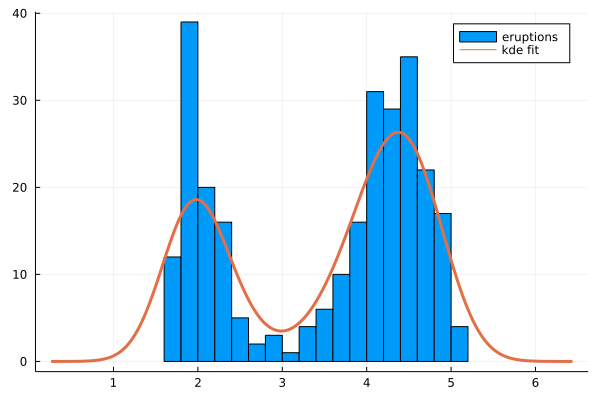

In [27]:

histogram(eruptions,bins=:sqrt,label="eruptions")
plot!(p.x,p.density .* length(eruptions) .*0.2, linewidth=3,color=2,label="kde fit") # nb of elements*bin width

Next, we will take a look at one probablity distribution, namely the normal distribution and verify that it generates a bell curve.

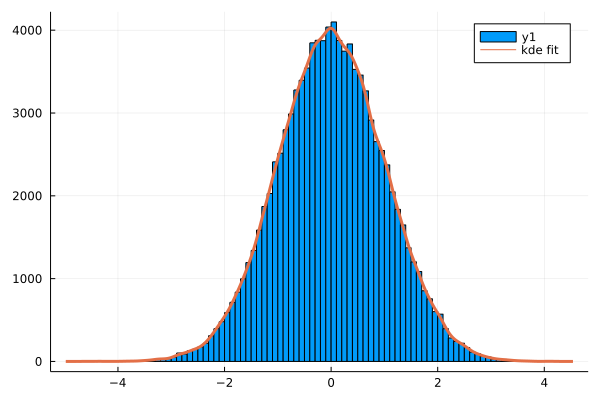

In [30]:
myrandomvector = randn(100_000)
histogram(myrandomvector)
p = kde(myrandomvector)
plot!(p.x, p.density .*length(myrandomvector) .* 0.1, linewidth=3, color=2, label="kde fit")

# Probability Distributions

Another way to generate the same plot is via using the `Distributions` package and choosing the probability distribution you want, and then drawing random numbers from it. As an example, we will use `d = Normal()` below.

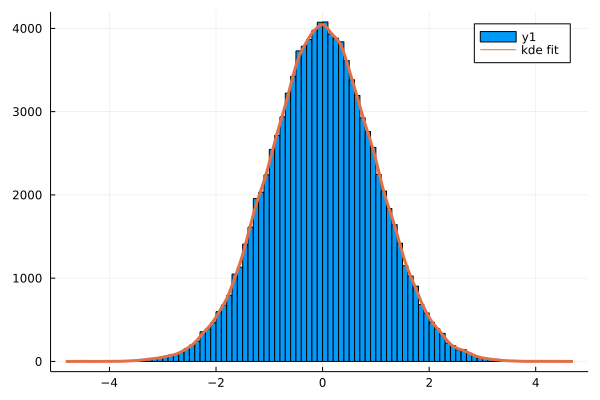

In [34]:
d = Normal()
myrandomvector = rand(d, 100000)
histogram(myrandomvector)
p = kde(myrandomvector)
plot!(p.x, p.density .*length(myrandomvector) .*0.1, linewidth=3, color=2, label="kde fit")

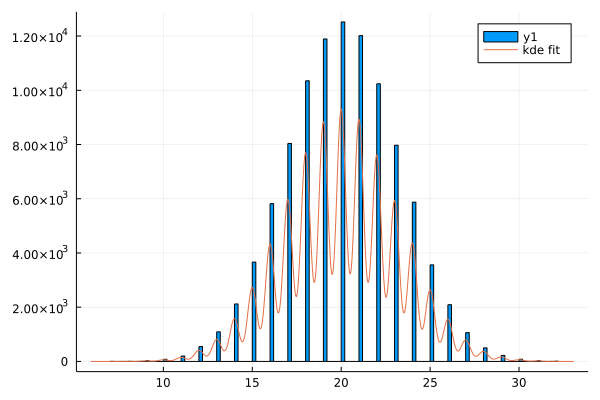

In [36]:
b= Binomial(40)
myrandomvector = rand(b, 100000)
histogram(myrandomvector)
p = kde(myrandomvector)
plot!(p.x, p.density .* length(myrandomvector) .*0.5, color=2, label="kde fit")


Next, we will try to fit a given set of numbers to a distribution.

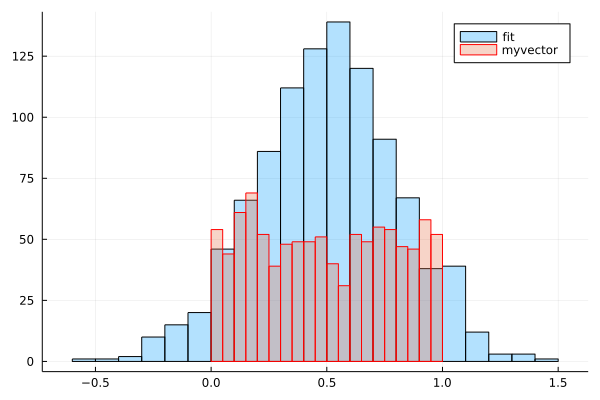

In [38]:
x = rand(1000)
d = fit(Normal, x)
myrandomvector = rand(d, 1000)
histogram(myrandomvector, nbins=20, fillalpha=0.3, label="fit")
histogram!(x, nbins=20, linecolor=:red, fillalpha=0.3, label="myvector")

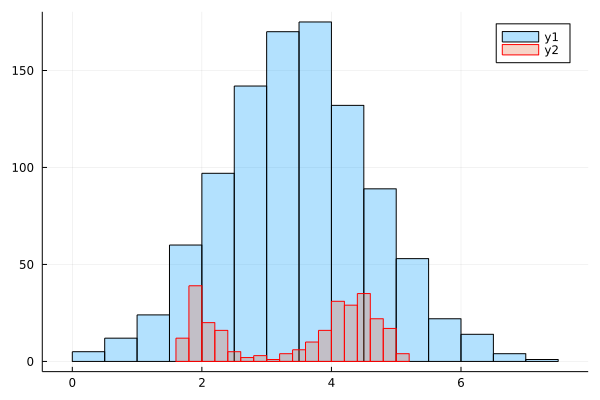

In [39]:
x = eruptions
d = fit(Normal, x)
myrandomvector = rand(d, 1000)
histogram(myrandomvector, nbins=20, fillalpha=0.3)
histogram!(x, nbins=20, linecolor = :red, fillalpha=0.3)

# Hypothesis Testing 

Next, we will perform hypothesis testing using the `HypothesisTests.jl` package.

In [40]:
myrandomvector = randn(1000)
OneSampleTTest(myrandomvector)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          0.0422363
    95% confidence interval: (-0.0198, 0.1043)

Test summary:
    outcome with 95% confidence: fail to reject h_0
    two-sided p-value:           0.1817

Details:
    number of observations:   1000
    t-statistic:              1.3364163821649055
    degrees of freedom:       999
    empirical standard error: 0.03160418187151213


In [41]:
OneSampleTTest(eruptions)

One sample t-test
-----------------
Population details:
    parameter of interest:   Mean
    value under h_0:         0
    point estimate:          3.48778
    95% confidence interval: (3.3515, 3.624)

Test summary:
    outcome with 95% confidence: reject h_0
    two-sided p-value:           <1e-99

Details:
    number of observations:   272
    t-statistic:              50.39726752574924
    degrees of freedom:       271
    empirical standard error: 0.06920579744632577


A note about p-values: Currently using the pvalue of spearman and pearson correlation from Python. But you can follow the formula here to implement your own. https://stackoverflow.com/questions/53345724/how-to-use-julia-to-compute-the-pearson-correlation-coefficient-with-p-value

Hint: Sometimes there are some issues getting Python and Julia to communicate as desired. One of the problems that might come up Cannot load libmkl_intel_thread.dylib can be solved by:

```
    using Conda
    Conda.rm("mkl")
    Conda.add("nomkl")
```

In [44]:
Pkg.build("PyCall")

    Building 

Conda ─→ `C:\Users\Anthony\.julia\scratchspaces\44cfe95a-1eb2-52ea-b672-e2afdf69b78f\299304989a5e6473d985212c28928899c74e9421\build.log`


    Building

 PyCall → `C:\Users\Anthony\.julia\scratchspaces\44cfe95a-1eb2-52ea-b672-e2afdf69b78f\169bb8ea6b1b143c5cf57df6d34d022a7b60c6db\build.log`


Precompiling

 project...


  ✓ Contour


  ✓ XLSX


  ✓ ColorVectorSpace


  ✓ Netpbm


  ✓ PyCall


  ✓ ImageMorphology


  ✓ ImageIO


  ✓ ImageTransformations


  ✓ ImageMetadata


  ✓ ImageDistances


  ✓ ImageContrastAdjustment


  ✓ ImageFiltering


  ✓ ImageQualityIndexes


  ✓ Images


  ✓ Plots


  ✓ StatsPlots


  16 dependencies successfully precompiled in 70 seconds (225 already precompiled)
  2 dependencies precompiled but different versions are currently loaded. Restart julia to access the new versions

In [45]:
using PyCall

# AUC and Confusion matrix

Finally, we will cover basic tools you will need such as AUC scores or confusion matrix. We use the MLBase package for that.

In [47]:
using MLBase

In [48]:

gt = [1, 1, 1, 1, 1, 1, 1, 2]
pred = [1, 1, 2, 2, 1, 1, 1, 1]

C = confusmat(2, gt, pred)  # compute confusion matrix
C ./ sum(C, dims=2)   # normalize per class
sum(diag(C)) / length(gt)  # compute correct rate from confusion matrix
correctrate(gt, pred)
C = confusmat(2, gt, pred)

2×2 Matrix{Int64}:
 5  2
 1  0

In [49]:
gt = [1, 1, 1, 1, 1, 1, 1, 0];
pred = [1, 1, 0, 0, 1, 1, 1, 1]
ROC = MLBase.roc(gt,pred)
recall(ROC)
precision(ROC)

0.8333333333333334